# How do I get data into my notebook?

## Setting file path

In [1]:
# Before we start importing, we want to set up our path since it is very long and we don't want to have to 
# type it repeatedly.
from pathlib import Path 

# Specify path, use 'r' before path to specify 'raw' path or Python will misread backslashes.
file_loc = Path(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\Data_files')

# Check to see if path is legit
print(file_loc.is_dir())

True


## CSVs and Excel files

In [2]:
# Importing CSVs and Excel using Pandas
import pandas as pd

In [3]:
# First, we'll import a CSV.
df_csv = pd.read_csv(file_loc/"Movie_Actors.csv") 
df_csv.head()

,Unnamed: 0,Actors,imdbID
0,0,Cass Barbera,tt2268369
1,2,Charles A. Post,tt0016750
2,3,Samuel Green,tt3405286
3,4,Surin Mendis,tt3816698
4,7,Baby Rube,tt0328410


In [4]:
# Then we'll import an Excel file
df_excel = pd.read_excel(file_loc/"Fortune1000.xlsx")
df_excel.head()

,Rank,Name,Revenue,revenue(% change),profits in millions,profits % change,assets,market value,change in rank in 1000,employees,change in rank(500 only),measure_up_rank
0,1,Walmart,559151.0,0.067,13510,-0.092,252496.0,382642.8,-,2300000,-,20
1,2,Amazon,386064.0,0.376,21331,0.841,321195.0,1558069.6,-,1298000,-,11
2,3,Apple,274515.0,0.055,57411,0.039,323888.0,2050665.9,1,147000,1,188
3,4,CVS Health,268706.0,0.046,7179,0.082,230715.0,98653.2,1,256500,1,57
4,5,UnitedHealth Group,257141.0,0.062,15403,0.113,197289.0,351725,2,330000,2,25


## PDF unstructured text files to wordclouds

In [5]:
# Now let's bring in some text files
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import PyPDF2 as pyp
import numpy as np
import random

In [6]:
#Open PDFs so they can be read, 'rb' means read only in binary format
Lincoln_pdf = open(file_loc/'Address_Lincoln.pdf', 'rb')
Washington_pdf = open(file_loc/'Address_Washington.pdf', 'rb')
Reagan_pdf = open(file_loc/'Address_Reagan.pdf', 'rb')
JFK_pdf = open(file_loc/'Address_JFK.pdf', 'rb')

In [7]:
JFK_read_pdf = pyp.PdfFileReader(JFK_pdf)
Lincoln_read_pdf = pyp.PdfFileReader(Lincoln_pdf)
Washington_read_pdf = pyp.PdfFileReader(Washington_pdf)
Reagan_read_pdf = pyp.PdfFileReader(Reagan_pdf)
JFK_data = ""
Lincoln_data = ""
Washington_data = ""
Reagan_data = ""

Xref table not zero-indexed. ID numbers for objects will be corrected.


In [8]:
Jnum_pages = JFK_read_pdf.numPages
for i in range(Jnum_pages) : 
        Jpage = JFK_read_pdf.getPage(i) 
        JFK_data = JFK_data + Jpage.extractText()
Lnum_pages = Lincoln_read_pdf.numPages
for i in range(Lnum_pages) : 
        Lpage = Lincoln_read_pdf.getPage(i)
        Lincoln_data = Lincoln_data + Lpage.extractText()
Wnum_pages = Washington_read_pdf.numPages
for i in range(Wnum_pages) : 
        Wpage = Washington_read_pdf.getPage(i)
        Washington_data = Washington_data + Wpage.extractText()
Rnum_pages = Reagan_read_pdf.numPages
for i in range(Rnum_pages) : 
        Rpage = Reagan_read_pdf.getPage(i)
        Reagan_data = Reagan_data + Rpage.extractText()

In [9]:
# Perform NLP on data to create more meaningful word clouds
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [Reagan_data, JFK_data, Washington_data, Lincoln_data]

# Turn words into vectors
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()

# Turn everything into a dataframe
df = pd.DataFrame(denselist, columns=feature_names)
data = df.transpose()

# Make sure you have these in the same order as your corpus above
data.columns = ['Reagan', 'JFK', 'Washington', 'Lincoln']
data.tail()

,Reagan,JFK,Washington,Lincoln
written,0.017775,0.000000,0.000000,0.0
year,0.126124,0.059078,0.000000,0.0
yes,0.017775,0.000000,0.000000,0.0
young,0.028028,0.029539,0.000000,0.0
zens,0.000000,0.000000,0.040268,0.0


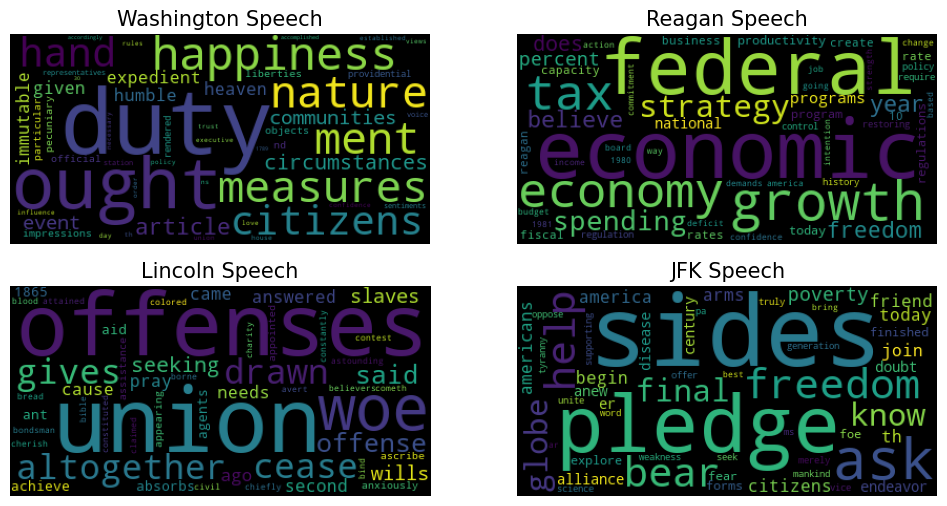

In [10]:
# Show wordclouds
colors = "viridis"
maxwords = 50

from matplotlib import pyplot as plt

# Set overall figure size
f = plt.figure(figsize=(12,6))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
Washington_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Washington'])
plt.imshow(Washington_wordcloud)
plt.axis('off')
plt.title('Washington Speech', fontsize=15)
# Subplot 2
plt.subplot(2, 2, 2)
Reagan_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Reagan'])
plt.imshow(Reagan_wordcloud)
plt.axis('off')
plt.title('Reagan Speech', fontsize=15)
# Subplot 3
plt.subplot(2, 2, 3)
Lincoln_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Lincoln'])
plt.imshow(Lincoln_wordcloud)
plt.axis('off')
plt.title('Lincoln Speech', fontsize=15)
# Subplot 4
plt.subplot(2, 2, 4)
JFK_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['JFK'])
plt.imshow(JFK_wordcloud)
plt.axis('off')
plt.title('JFK Speech', fontsize=15);

## Images from Github repo

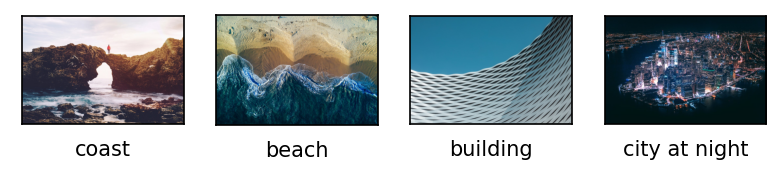

In [11]:
#Import libraries
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import PIL
import base64, io, IPython
from PIL import Image as Image
from urllib.request import urlopen

#Pull in files, create folder containing all four files
folder = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Visualization-Workshop/master/Datasets/images/'
files = ['photo-1.jpg', 'photo-2.jpg', 'photo-3.jpg', 'photo-4.jpg']        #How do we automatically iterate over all files in GitHub Folder?
imgs = [Image.open(urlopen(os.path.join(folder, file))) for file in files]

#Now, let's print them out to look at them
fig, axes = plt.subplots(1, 4) 
fig.dpi = 150
labels = ['coast', 'beach', 'building', 'city at night'] 
for i in range(len(imgs)): 
    axes[i].imshow(imgs[i]) 
    axes[i].set_xticks([]) 
    axes[i].set_yticks([]) 
    axes[i].set_xlabel(labels[i], color='black')
imgarr = np.array(imgs[i])



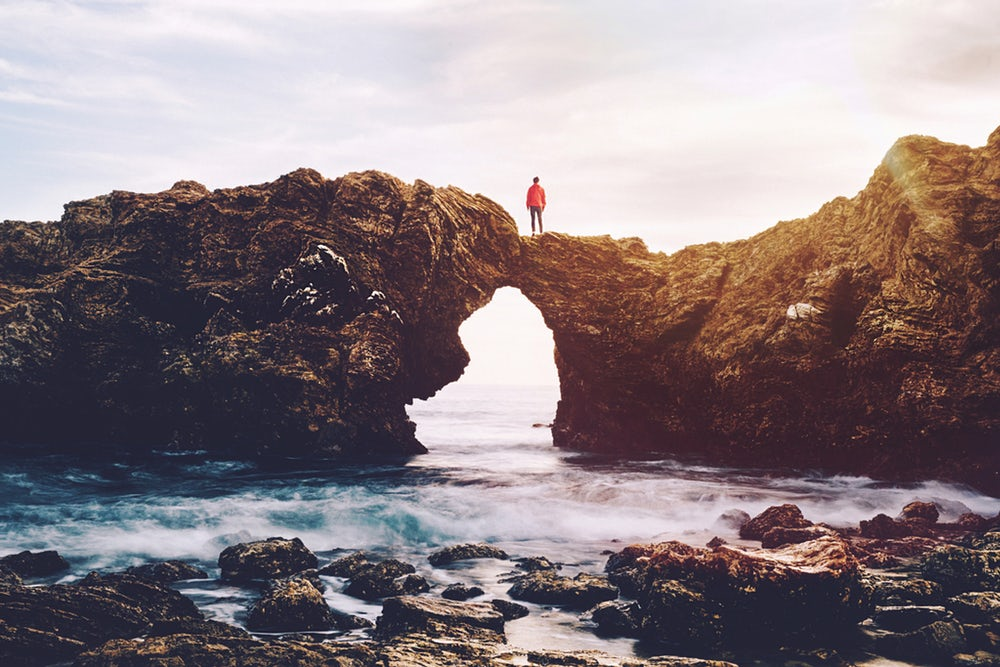

In [12]:
#Let's say we don't want to keep looking for the images on GitHub. We can embed them into our notebook forever...
html = []
for i in range(len(imgs)):
    output = io.BytesIO()
    imgs[i].save(output, format='PNG')
    encoded_string = base64.b64encode(output.getvalue()).decode()
    html.append('<img src="data:image/png;base64,{}"/>'.format(encoded_string))
IPython.display.HTML(html[0])       # Change index from 0 to 1, 2 or 3 to see others

# Special topics in data preprocessing

## Application Programming Interfaces

In [13]:
import requests

# The endpoint URL for joke data API
joke_api_url = f"https://official-joke-api.appspot.com/random_joke"

# Send GET request
joke_response = requests.get(joke_api_url)

# Assign response to a dataset name
joke = joke_response.json()

# Print the setup part of the response
print(joke['setup'])

Why did the fireman wear red, white, and blue suspenders?


In [14]:
# Print the punchline part of the response
print(joke['punchline'])

To hold his pants up.


In [15]:
# The endpoint URL for country data API
api_url = f"https://restcountries.com/v3.1/all"

# Send GET request
response = requests.get(api_url)

data = response.json()

# Let's look at one record in the response
data[0]


{'name': {'common': 'Andorra',
  'official': 'Principality of Andorra',
  'nativeName': {'cat': {'official': "Principat d'Andorra",
    'common': 'Andorra'}}},
 'tld': ['.ad'],
 'cca2': 'AD',
 'ccn3': '020',
 'cca3': 'AND',
 'cioc': 'AND',
 'independent': True,
 'status': 'officially-assigned',
 'unMember': True,
 'currencies': {'EUR': {'name': 'Euro', 'symbol': '€'}},
 'idd': {'root': '+3', 'suffixes': ['76']},
 'capital': ['Andorra la Vella'],
 'altSpellings': ['AD', 'Principality of Andorra', "Principat d'Andorra"],
 'region': 'Europe',
 'subregion': 'Southern Europe',
 'languages': {'cat': 'Catalan'},
 'translations': {'ara': {'official': 'إمارة أندورا', 'common': 'أندورا'},
  'bre': {'official': 'Priñselezh Andorra', 'common': 'Andorra'},
  'ces': {'official': 'Andorrské knížectví', 'common': 'Andorra'},
  'cym': {'official': 'Tywysogaeth Andorra', 'common': 'Andorra'},
  'deu': {'official': 'Fürstentum Andorra', 'common': 'Andorra'},
  'est': {'official': 'Andorra Vürstiriik', 'c

In [16]:
countries_df = pd.DataFrame(columns = ['name', 'UN Member', 'Region', 'Lat-Long', 'Population', 'Driving side', 'Start of week'] )

for i in data:
    countries = \
    [
        i['name']['common'],
        i['unMember'],
    #    i['capital'],
        i['region'],
        i['latlng'],
        i['population'],
    #    i['gini'],
        i['car']['side'],
        i['startOfWeek']
    ]
    countries_df.loc[len(countries_df)] = countries

countries_df

,name,UN Member,Region,Lat-Long,Population,Driving side,Start of week
0,Andorra,True,Europe,"[42.5, 1.5]",77265,right,monday
1,French Southern and Antarctic Lands,False,Antarctic,"[-49.25, 69.167]",400,right,monday
2,Laos,True,Asia,"[18.0, 105.0]",7275556,right,monday
3,Canada,True,Americas,"[60.0, -95.0]",38005238,right,sunday
4,Nigeria,True,Africa,"[10.0, 8.0]",206139587,right,monday
...,...,...,...,...,...,...,...
245,American Samoa,False,Oceania,"[-14.33333333, -170.0]",55197,right,monday
246,Venezuela,True,Americas,"[8.0, -66.0]",28435943,right,monday
247,Costa Rica,True,Americas,"[10.0, -84.0]",5094114,right,monday
248,Puerto Rico,False,Americas,"[18.25, -66.5]",3194034,right,monday


## Text processing / classification

In [17]:
import joblib
import re
import string

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

In [18]:
categories = [
    "alt.atheism",
    "misc.forsale",
    "sci.space",
    "soc.religion.christian",
    "talk.politics.guns",
]

news_group_data = fetch_20newsgroups(
    subset="all", remove=("headers", "footers", "quotes"), categories=categories
)

df = pd.DataFrame(
    dict(
        text=news_group_data["data"],
        target=news_group_data["target"]
    )
)
df["target"] = df.target.map(lambda x: categories[x])

In [19]:
df

,text,target
0,At one time there was speculation that the fir...,sci.space
1,Apple IIgs\nImagewriter II COLOR printer\nColo...,misc.forsale
2,\n\nI heard he had asked the FBI to provide hi...,alt.atheism
3,"Coming from a long line of ""hot tempered"" peop...",soc.religion.christian
4,I'm not sure were this thread has been before ...,talk.politics.guns
...,...,...
4663,\nOr perhaps David Koresh didn't listen too we...,talk.politics.guns
4664,Howdy! I'm just posting this for a friend so d...,misc.forsale
4665,Great SLR camera (Ricoh) for sale. Has all the...,misc.forsale
4666,\n\n\n\nYou may want to put Hubble back in the...,sci.space


In [20]:
def process_text(text):
    text = str(text).lower()
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", " ", text
    )
    text = " ".join(text.split())
    return text

df["clean_text"] = df.text.map(process_text)

In [21]:
df_train, df_test = train_test_split(df, test_size=0.20, stratify=df.target)

In [22]:
vec = CountVectorizer(
    ngram_range=(1, 3), 
    stop_words="english",
)

X_train = vec.fit_transform(df_train.clean_text)
X_test = vec.transform(df_test.clean_text)

y_train = df_train.target
y_test = df_test.target

In [23]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.52      0.66       160
          misc.forsale       0.97      0.88      0.92       195
             sci.space       0.89      0.86      0.87       197
soc.religion.christian       0.65      0.97      0.78       200
    talk.politics.guns       0.92      0.89      0.90       182

              accuracy                           0.84       934
             macro avg       0.87      0.82      0.83       934
          weighted avg       0.87      0.84      0.83       934



In [24]:
joblib.dump(nb, "nb.joblib")
joblib.dump(vec, "vec.joblib")

['vec.joblib']

In [25]:
nb_saved = joblib.load("nb.joblib")
vec_saved = joblib.load("vec.joblib")

sample_text = ["Space, Stars, Planets and Astronomy!"]
# Process the text in the same way you did when you trained it!
clean_sample_text = process_text(sample_text)
sample_vec = vec_saved.transform(sample_text)
nb_saved.predict(sample_vec)

array(['sci.space'], dtype='<U22')

In [ ]:
! pip freeze

absl-py==1.3.0
affine==2.3.1
aiohttp==3.8.3
aiosignal==1.3.1
ale-py==0.8.0
altair==4.2.0
ansi2html==1.8.0
anyascii==0.3.2
anyio==3.6.2
appdirs==1.4.4
apptools==5.2.0
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
artist==0.18.2
asttokens==2.0.8
astunparse==1.6.3
async-timeout==4.0.2
attrs==22.1.0
audioread==3.0.0
autobahn==22.12.1
backcall==0.2.0
beautifulsoup4==4.11.1
binaryornot==0.4.4
bleach==5.0.1
blinker==1.5
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
Brotli==1.0.9
cachetools==5.2.0
catalogue==2.0.8
celluloid==0.2.0
certifi==2022.9.24
cffi==1.15.1
chardet==5.0.0
charset-normalizer==2.1.1
chart-studio==1.1.0
click==8.1.3
click-default-group==1.2.2
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.0
cloup==0.13.1
clustergram==0.6.0
clusteval==2.1.4
cmake==3.24.1.1
cmdstanpy==1.2.0
cmp==0.0.1
cmyt==1.1.3
codecarbon==2.3.1
colorama==0.4.6
colorcet==3.0.1
colorlover==0.3.0
colorspacious==1.1.2
colour==0.1.5
colourmap==1.1.9
commonmark==0.9.1
confection==0.0.4
ConfigArgParse